In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from time import time
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score as f1_score_rep
from sklearn.metrics import accuracy_score

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

2024-03-05 23:27:52.558775: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 23:27:52.589049: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 23:27:52.589087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 23:27:52.589782: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 23:27:52.594350: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 23:27:52.595067: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

In [3]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)

input_shape = x_train.shape[1:]

num_classes = len(np.unique(y_train))

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=20, kernel_size=4, strides=2, padding='valid', activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling1D())
cnn_model.add(Conv1D(filters=20, kernel_size=4, strides=2, padding='same', activation='relu'))
cnn_model.add(Conv1D(filters=3, kernel_size=2, strides=1, padding='same', activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=100, activation='relu'))
cnn_model.add(Dense(units=num_classes, activation='softmax'))

opt = SGD(lr=0.001) 

cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
hist = cnn_model.fit(x_train, y_train, epochs=50, batch_size=64,
                     validation_data=(x_val, y_val), 
                     callbacks=[early_stopping])

from joblib import dump, load
dump(hist, "/home/jovyan/Edge-IIoT/pre_train/CNN.joblib")


2024-03-05 23:27:54.036012: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
196/196 [==============================] - 1s 2ms/step - loss: 1.1318 - accuracy: 0.5428 - val_loss: 0.8951 - val_accuracy: 0.7422
Epoch 2/50
196/196 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.9263 - val_loss: 0.3315 - val_accuracy: 0.9419
Epoch 3/50
196/196 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.9427 - val_loss: 0.1780 - val_accuracy: 0.9484
Epoch 4/50
196/196 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.9560 - val_loss: 0.1132 - val_accuracy: 0.9630
Epoch 5/50
196/196 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9750 - val_loss: 0.0791 - val_accuracy: 0.9789
Epoch 6/50
196/196 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9818 - val_loss: 0.0643 - val_accuracy: 0.9798
Epoch 7/50
196/196 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9844 - val_loss: 0.0568 - val_accuracy: 0.9815
Epoch 

['/home/jovyan/Edge-IIoT/pre_train/CNN.joblib']

In [ ]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = cnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

131/131 [==============================] - 0s 2ms/step
FPR: [0.00125156 0.         0.02423698 0.        ]
TPR: [0.68421053 1.         0.99742002 1.        ]
FNR: [0.31578947 0.         0.00257998 0.        ]
TNR: [0.99874844 1.         0.97576302 1.        ]
Precision: 0.9829599363073089
Accuracy: 0.985837734037446
F1-score: 0.9459007412882329
AUC: 0.9980713759106765
FPR: 0.006372137074395058
tpr: 0.920407636738906
fnr: 0.07959236326109391
tnr: 0.9936278629256049


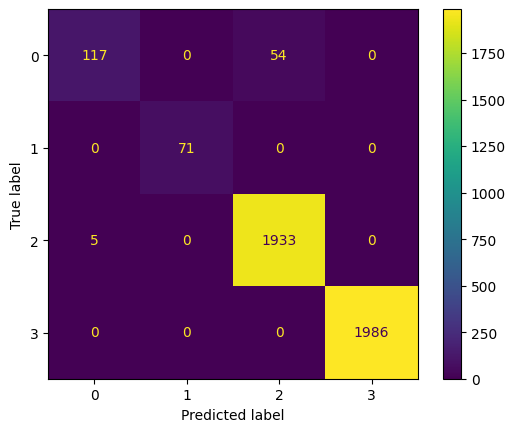

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score



conf_matrix = confusion_matrix(y_test, y_hat)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_hat, average='macro')
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='macro')
auc = roc_auc_score(y_test, cnn_model.predict(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()